In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as k
from tensorflow.keras.utils import get_custom_objects

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#tf.compat.v1.disable_eager_execution()

In [ ]:
# download the dataset
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# image classes or categories
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
print("Number of Training Samples: ", len(x_train))
print("Number of Validation Samples: ", len(x_val))

Number of Training Samples:  60000
Number of Validation Samples:  10000


In [ ]:
# shape of images
print("Shape of Training images: ", x_train.shape)
print("Shape of Validation images: ", x_val.shape)

Shape of Training images:  (60000, 28, 28)
Shape of Validation images:  (10000, 28, 28)


In [ ]:
# reshape for training and testing
x_train = x_train.reshape(60000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)

In [ ]:
# change data type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

In [ ]:
# normalize data into range 1-0
x_train /= 255.0
x_val /= 255.0

In [ ]:
print("Training shape: ", x_train.shape)
print("Validation shape: ", x_val.shape)

Training shape:  (60000, 28, 28, 1)
Validation shape:  (10000, 28, 28, 1)


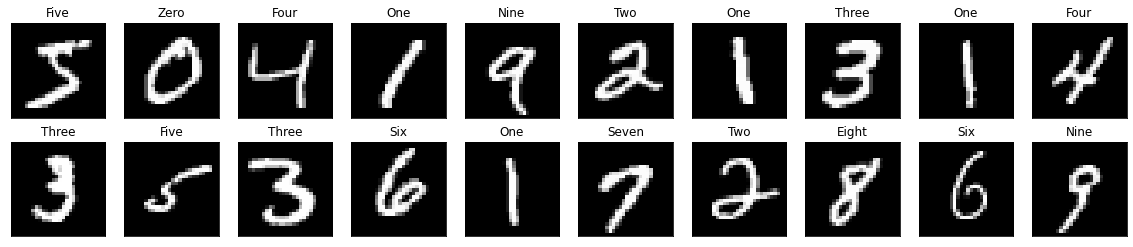

In [ ]:
# show some training images
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_train[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_train[idx]])

In [ ]:
input_shape = (28, 28, 1)
batch_size = 32
epochs = 5

In [ ]:
# create LeNet model on mnist data
model = Sequential()

# 1st Convolution Layer
model.add(Conv2D(filters = 20, kernel_size = (5, 5), input_shape = input_shape, padding = 'same'))

# Relu actvation layer 1
model.add(Activation('relu'))

# Polling layer
model.add(MaxPooling2D( pool_size = (2, 2)))

# 2nd Convolution Layer
model.add(Conv2D(filters = 50, kernel_size = (5, 5), padding = 'same'))

# Relu actvation layer 2
model.add(Activation('relu'))

# Polling layer 2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected or Dense layer
model.add(Dense(units = 500)) 

# Relu actvation layer 3
model.add(Activation('relu'))

# Fully connected or Dense layer
model.add(Dense(units = 10)) 

# softmax layer 3
model.add(Activation('softmax'))

# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0

In [ ]:
# compile the model
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [ ]:
# Fit the model on dataset
history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    batch_size = batch_size,
                    epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2418 - accuracy: 0.9247 - val_loss: 0.0405 - val_accuracy: 0.9867
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0383 - accuracy: 0.9874 - val_loss: 0.0320 - val_accuracy: 0.9897
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9955 - val_loss: 0.0254 - val_accuracy: 0.9920


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_val[:1000], y_val[:1000])
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9930

Model Accuracy on test images:  0.993
Model Loss on test images:  0.0245


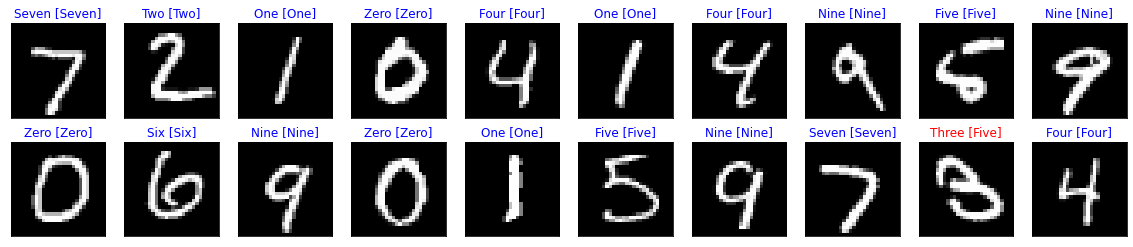

In [ ]:
# predict some testing images
predictions = model.predict(x_val)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_val[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(x_val[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_val[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)

## 1. Fast Gradient Sign Attack and Reconstruction of Adversarial Example

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_val[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_val[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.FGSM()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.09)

# adversarial purtubation
perturb = adv_img - x_val[:1000]

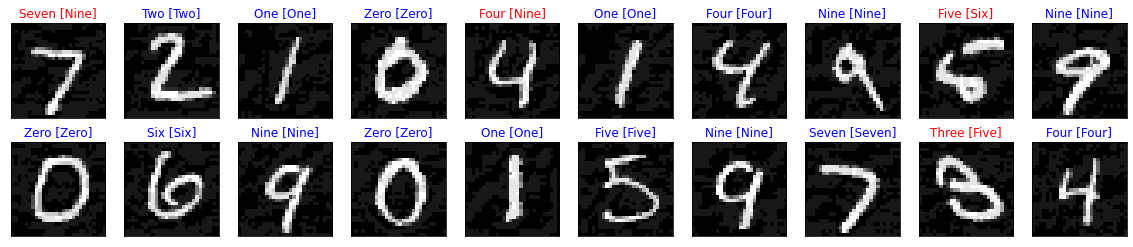

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[y_val[idx]] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_val[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 1s 18ms/step - loss: 1.0383 - accuracy: 0.7790

Model Accuracy on test images:  0.779
Model Loss on test images:  1.0383


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_fgsm.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

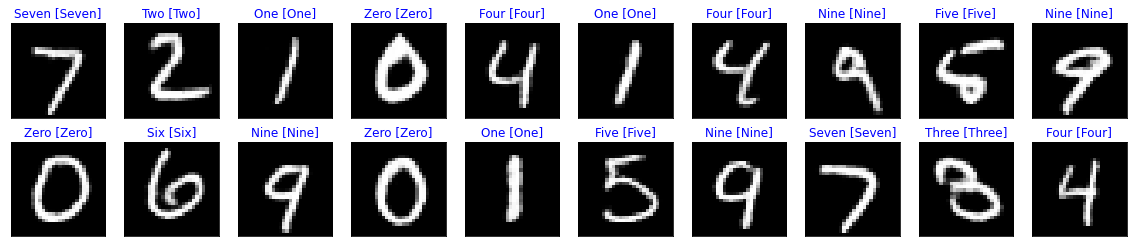

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_val[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_val[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 1s 18ms/step - loss: 0.1467 - accuracy: 0.9570

Model Accuracy on restored images:  0.957
Model Loss on test images:  0.1467


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9745


# 2. Basic Iterative Method (Attack) and Reconstruction of Adversarial Examples 

In [ ]:
pred = model.predict(x_val[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_val[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.L2BasicIterativeAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 1.2)

# adversarial purtubation
perturb = adv_img - x_val[:1000]

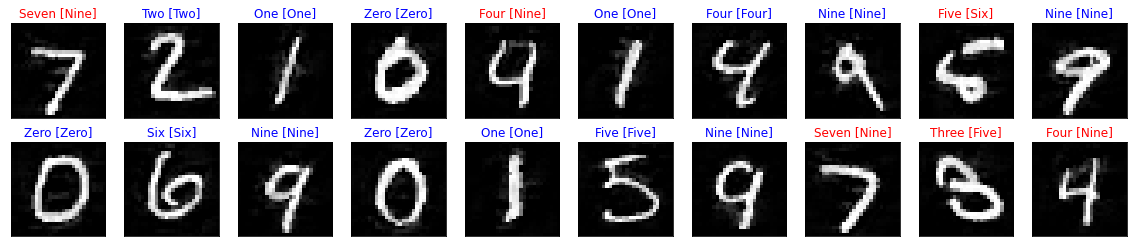

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[y_val[idx]] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_val[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 1s 18ms/step - loss: 2.0698 - accuracy: 0.6090

Model Accuracy on test images:  0.609
Model Loss on test images:  2.0698


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_bim.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

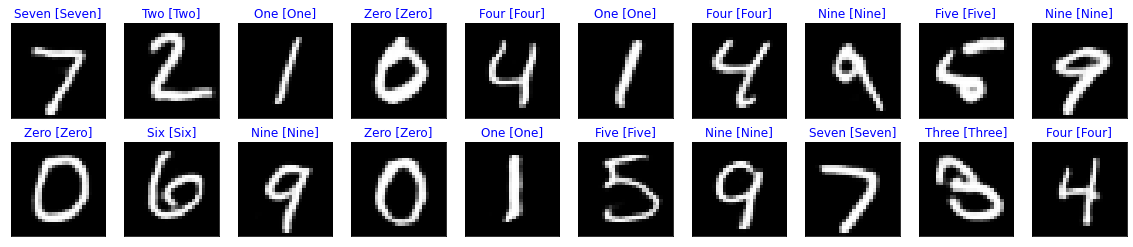

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_val[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_val[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 1s 18ms/step - loss: 0.1024 - accuracy: 0.9620

Model Accuracy on restored images:  0.962
Model Loss on test images:  0.1024


In [ ]:
print('Success of Defens Model: ', round(rest_accuracy / orig_accuracy, 4))

Success of Defens Model:  0.9796


#3. Projected Gradient Descent Attack and Reconstruction of Adverasarial Examples

In [ ]:
pred = model.predict(x_val[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_val[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.PGD()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.18)

# adversarial purtubation
perturb = adv_img - x_val[:1000]

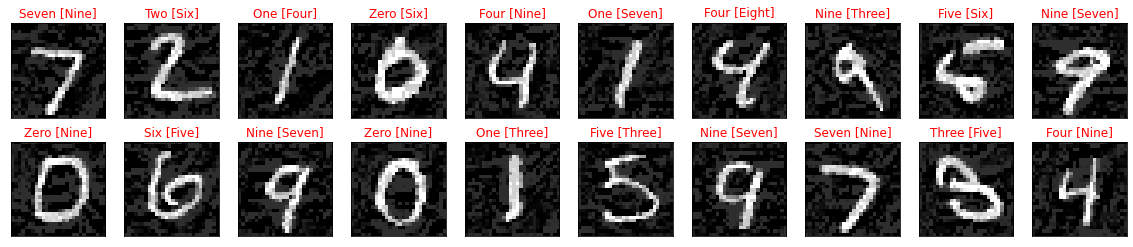

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[y_val[idx]] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_val[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 1s 18ms/step - loss: 8.7601 - accuracy: 0.0960

Model Accuracy on test images:  0.096
Model Loss on test images:  8.7601


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_pgd.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

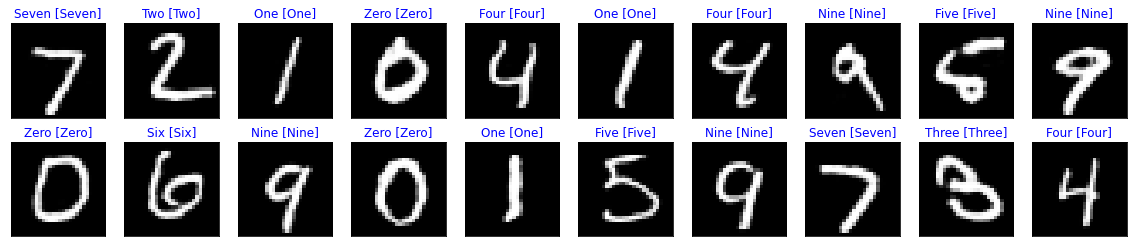

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_val[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_val[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 1s 18ms/step - loss: 0.1314 - accuracy: 0.9590

Model Accuracy on restored images:  0.959
Model Loss on test images:  0.1314


In [ ]:
print('Success of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Success of Defence Model:  0.9766


#4. Deep Fool Attack

In [ ]:
pred = model.predict(x_val[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_val[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.L2DeepFoolAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 2)

# adversarial purtubation
perturb = adv_img - x_val[:1000]

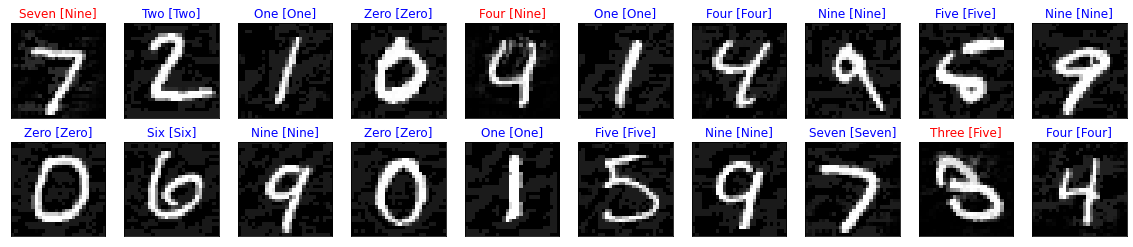

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[y_val[idx]] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_val[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 1s 17ms/step - loss: 1.3646 - accuracy: 0.7430

Model Accuracy on test images:  0.743
Model Loss on test images:  1.3646


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_dfa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

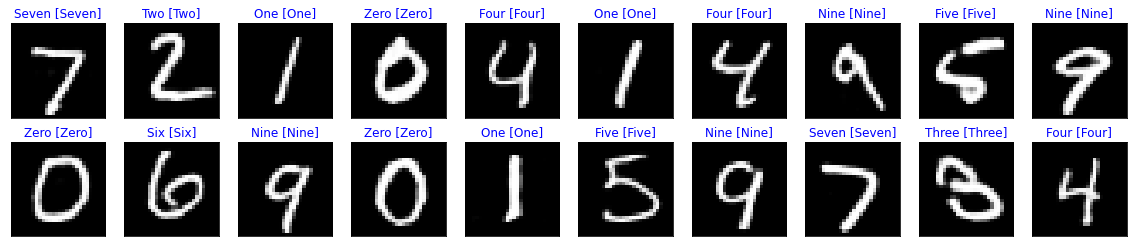

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_val[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_val[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 1s 17ms/step - loss: 0.1117 - accuracy: 0.9620

Model Accuracy on restored images:  0.962
Model Loss on test images:  0.1117


In [ ]:
print('Success of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Success of Defence Model:  0.9796


# 5. Carlini and Wanger Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
pred = model.predict(x_val[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_val[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.L2CarliniWagnerAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 5)

# adversarial purtubation
perturb = adv_img - x_val[:1000]

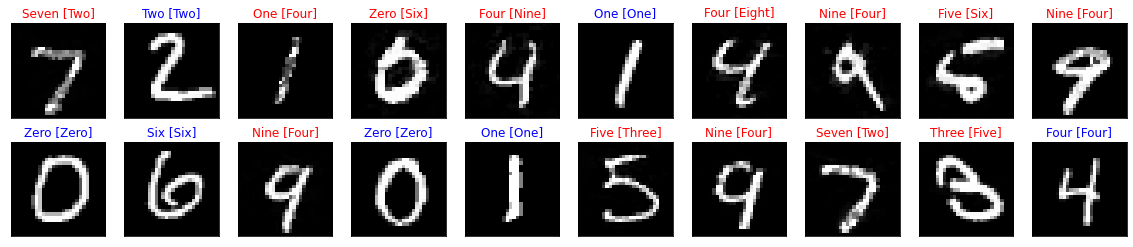

In [ ]:
adv_pred = model.predict(adv_img[:1000].numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[y_val[idx]] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_val[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.3730

Model Accuracy on test images:  0.373
Model Loss on test images:  0.6002


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/mnist_cwa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

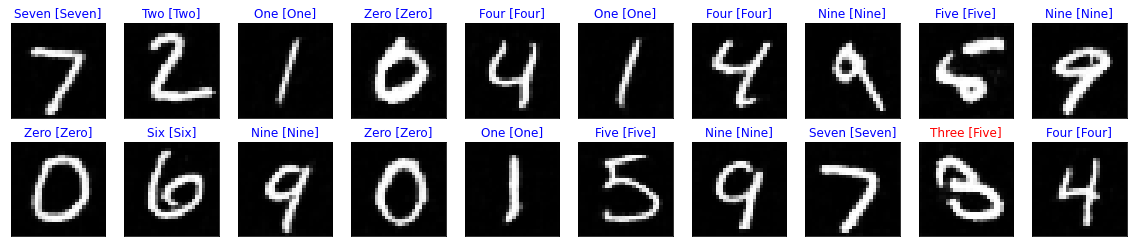

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_val[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_val[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9940

Model Accuracy on restored images:  0.994
Model Loss on test images:  0.0242


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  1.001


# 6. Spatial attack and Reconstruction of Adverasarial Examples

In [ ]:
pred = model.predict(x_val[:1000])

label = []
for i in range(len(pred)):
  y_pred = np.argmax(pred[i])
  l = label.append(y_pred) 


labels = np.asarray(label)

images = tf.cast(x_val[:1000], dtype = tf.float32)
labels = tf.cast(labels, dtype = tf.int32)

images = ep.astensor(images)
labels = ep.astensor(labels)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

# create attack
attack = foolbox.attacks.SpatialAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c)

# adversarial purtubation
perturb = adv_img - x_val[:1000]

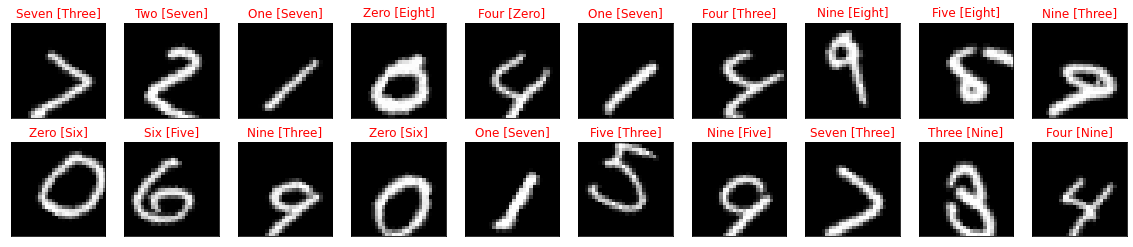

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[y_val[idx]] + " [" + class_names[int(np.argmax(adv_pred[idx]))] + "]", color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_val[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 1s 18ms/step - loss: 4.3977 - accuracy: 0.0080

Model Accuracy on test images:  0.008
Model Loss on test images:  4.3977


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_spa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

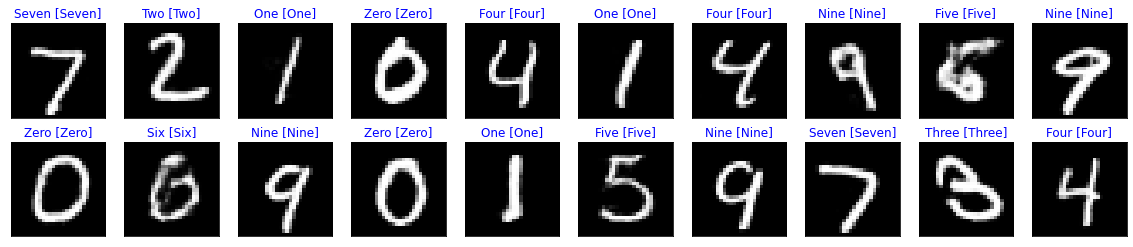

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_val[idx]] + ' [' + class_names[np.argmax(predictions[idx])] + ']', color =  color)
  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_val[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 1s 18ms/step - loss: 0.4277 - accuracy: 0.9320

Model Accuracy on restored images:  0.932
Model Loss on test images:  0.4277


In [ ]:
print('Success of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Success of Defence Model:  0.9491
